In [53]:
import pandas as pd
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [54]:
""" # Read the file with the original encoding (Latin-1)
with open('/Users/EberlP/Developer/idp/data/Vehicle_Information.csv', 'r', encoding='latin1') as file:
    content = file.read()

# Write the content to a new file with UTF-8 encoding
with open('/Users/EberlP/Developer/idp/data/Vehicle_Information_utf8.csv', 'w', encoding='utf-8') as file:
    file.write(content) """

" # Read the file with the original encoding (Latin-1)\nwith open('/Users/EberlP/Developer/idp/data/Vehicle_Information.csv', 'r', encoding='latin1') as file:\n    content = file.read()\n\n# Write the content to a new file with UTF-8 encoding\nwith open('/Users/EberlP/Developer/idp/data/Vehicle_Information_utf8.csv', 'w', encoding='utf-8') as file:\n    file.write(content) "

In [55]:
# Load the data
accidents = pd.read_csv('/Users/EberlP/Developer/idp/data/Accident_Information.csv', na_values=['NA'])
vehicles = pd.read_csv('/Users/EberlP/Developer/idp/data/Vehicle_Information_utf8.csv', na_values=['NA'])

# Display the first few rows to understand the data
print(accidents.head())
print(vehicles.head())


/var/folders/vg/pnxtgkqs1tn9yw1qm9hzdh9r0000gn/T/ipykernel_70661/643200665.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents = pd.read_csv('/Users/EberlP/Developer/idp/data/Accident_Information.csv', na_values=['NA'])


  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200501BS00001              A           3218.0            NaN   
1  200501BS00002              B            450.0              C   
2  200501BS00003              C              0.0            NaN   
3  200501BS00004              A           3220.0            NaN   
4  200501BS00005   Unclassified              0.0            NaN   

   2nd_Road_Number Accident_Severity Carriageway_Hazards        Date  \
0              0.0           Serious                 NaN  2005-01-04   
1              0.0            Slight                 NaN  2005-01-05   
2              0.0            Slight                 NaN  2005-01-06   
3              0.0            Slight                 NaN  2005-01-07   
4              0.0            Slight                 NaN  2005-01-10   

  Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0     Tuesday                                          1.0  ...   
1   Wednesday                 

In [56]:
# Handling missing values
accidents.dropna(inplace=True)
vehicles.dropna(inplace=True)

# Merging datasets on 'Accident_Index'
data = pd.merge(accidents, vehicles, on='Accident_Index')
data.to_csv('/Users/EberlP/Developer/idp/data/merged.csv')
print(data.head())

  Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200514A024005              A            630.0   Unclassified   
1  200543P100075   Unclassified            263.0   Unclassified   
2  200632C188406              B           1183.0   Unclassified   
3  200705DD18557       Motorway              6.0       Motorway   
4  2008130926708              A            643.0   Unclassified   

   2nd_Road_Number Accident_Severity                      Carriageway_Hazards  \
0              0.0            Slight  Pedestrian in carriageway - not injured   
1              0.0           Serious                     Other object on road   
2              0.0            Slight                     Vehicle load on road   
3              6.0            Slight                        Previous accident   
4              0.0            Slight                     Vehicle load on road   

         Date Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
0  2005-01-30      Sunday      

In [57]:
# Example: Analysis of accidents by weather conditions and severity
weather_conditions = data.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()

# Example: Analysis of accidents by time of day
time_of_day = data.groupby('Time')['Accident_Severity'].value_counts().unstack()

print(weather_conditions)
print(time_of_day)

Accident_Severity      Fatal  Serious  Slight
Weather_Conditions                           
Fine no high winds       1.0      2.0    10.0
Fog or mist              NaN      NaN     2.0
Raining + high winds     NaN      NaN     1.0
Raining no high winds    NaN      1.0     3.0
Unknown                  NaN      NaN     1.0
Accident_Severity  Fatal  Serious  Slight
Time                                     
02:31                NaN      NaN     1.0
05:10                NaN      NaN     1.0
07:20                NaN      1.0     NaN
07:48                NaN      NaN     1.0
08:05                NaN      NaN     1.0
08:37                NaN      NaN     1.0
09:00                NaN      NaN     1.0
09:52                NaN      NaN     1.0
10:40                NaN      NaN     1.0
11:15                NaN      NaN     1.0
13:03                NaN      NaN     1.0
13:20                NaN      NaN     1.0
13:38                NaN      NaN     1.0
14:40                NaN      NaN     1.0
14:50 

In [58]:
G = nx.Graph()

for index, row in accidents.iterrows():
    # Add accident as a node with attributes
    G.add_node(row['Accident_Index'], severity=row['Accident_Severity'], weather=row['Weather_Conditions'], road=row['Road_Surface_Conditions'])

    # Example of adding an edge (if you have meaningful relationships to represent)
    # G.add_edge(row['Accident_Index'], row['Other_Node'])

# Analyzing the graph (basic analysis)
# Number of nodes
num_nodes = G.number_of_nodes()

# Number of edges
num_edges = G.number_of_edges()

# Average degree
average_degree = sum(dict(G.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {average_degree:.2f}")

Number of nodes: 1445
Number of edges: 0
Average degree: 0.00


In [59]:
# Example: Finding nodes (accidents) with highest degree, indicating most common factors
degrees = G.degree()
sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
print(sorted_degrees[:10])  # Top 10 nodes with the highest degree


[('200501CW10234', 0), ('200501CW10370', 0), ('200501CW10379', 0), ('200501CW10648', 0), ('200501FH10528', 0), ('200501HT20399', 0), ('200501JC30760', 0), ('200501MM79111', 0), ('200501PY20910', 0), ('200501PY21017', 0)]


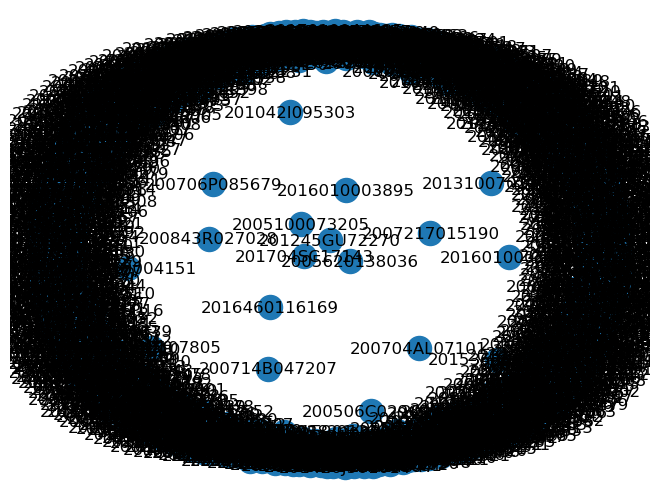

In [60]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)  # Set to True for labels, but beware of clutter
plt.show()


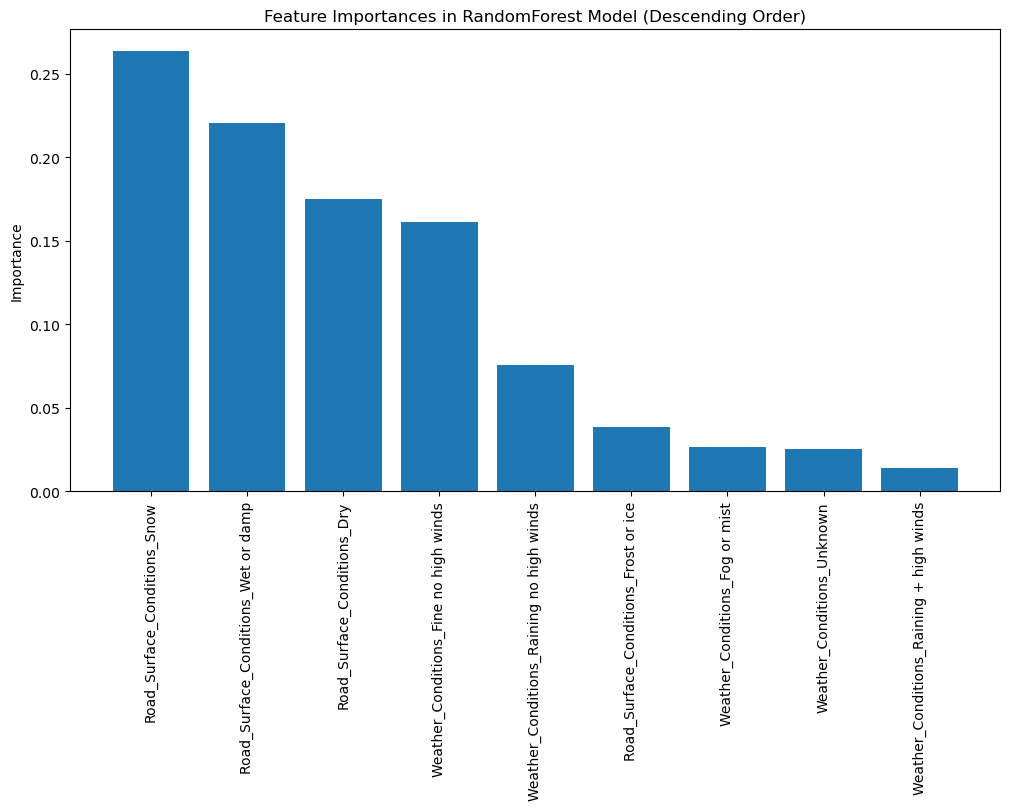

In [61]:
# One-Hot Encoding for categorical variables
encoded_data = pd.get_dummies(data[['Weather_Conditions', 'Road_Surface_Conditions']])
y = data['Accident_Severity']  # Target variable

# Fit the RandomForest model
model = RandomForestClassifier(random_state=0)  # random_state for reproducibility
model.fit(encoded_data, y)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = importances.argsort()[::-1]

# Rearrange your feature names and importances according to the sorted indices
sorted_feature_names = encoded_data.columns[indices]
sorted_importances = importances[indices]

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.title('Feature Importances in RandomForest Model (Descending Order)')
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.ylabel('Importance')
plt.show()

In [62]:
accidents['Road_Surface_Conditions'] = pd.to_numeric(accidents['Road_Surface_Conditions'], errors='coerce')

# Convert 'Accident_Severity' to a numeric type
accidents['Accident_Severity'] = pd.to_numeric(accidents['Accident_Severity'], errors='coerce')

# Drop rows where 'Accident_Severity' or 'Time' became NaN after conversion
#data = accidents.dropna(subset=['Accident_Severity', 'Time'])

print(accidents.head())

     Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
1198  200501CW10234              A              4.0              A   
1289  200501CW10370              A            202.0              B   
1297  200501CW10379   Unclassified              0.0   Unclassified   
1526  200501CW10648              A              4.0   Unclassified   
4501  200501FH10528   Unclassified              0.0   Unclassified   

      2nd_Road_Number  Accident_Severity   Carriageway_Hazards        Date  \
1198              4.0                NaN  Other object on road  2005-02-12   
1289            310.0                NaN  Vehicle load on road  2005-03-18   
1297              0.0                NaN  Other object on road  2005-03-19   
1526              0.0                NaN  Vehicle load on road  2005-05-17   
4501              0.0                NaN  Other object on road  2005-10-05   

     Day_of_Week  Did_Police_Officer_Attend_Scene_of_Accident  ...  \
1198    Saturday                        

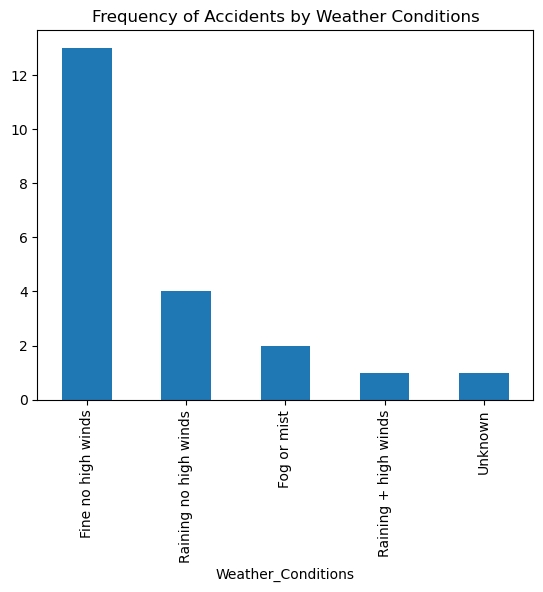

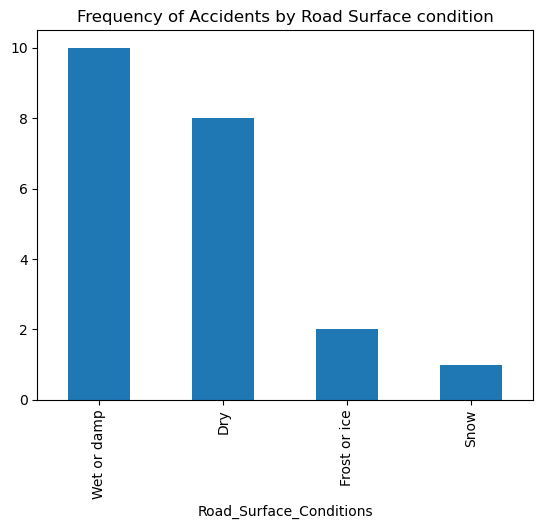

In [63]:
# Frequency of accidents in different weather conditions
weather_accidents = data['Weather_Conditions'].value_counts()
weather_accidents.plot(kind='bar')
plt.title('Frequency of Accidents by Weather Conditions')
plt.show()

# Frequency of accidents at different times
time_accidents = data['Road_Surface_Conditions'].value_counts()
time_accidents.plot(kind='bar')
plt.title('Frequency of Accidents by Road Surface condition')
plt.show()

In [64]:
# Creating an empty dictionary to hold the top 3 values for each column
top3_values = {}

# Iterate over each column in the dataframe
for column in accidents.columns:
    # Get the top 3 most frequent values for the column
    top_values = accidents[column].value_counts().head(3)
    # Store the result in the dictionary
    top3_values[column] = top_values

# Display the top 3 most frequent values for each column
for column, values in top3_values.items():
    print(f"Top 3 most frequent values in '{column}':")
    print(values, "\n")


Top 3 most frequent values in 'Accident_Index':
Accident_Index
200501CW10234    1
2014300010783    1
2014214005748    1
Name: count, dtype: int64 

Top 3 most frequent values in '1st_Road_Class':
1st_Road_Class
A               693
Unclassified    390
B               175
Name: count, dtype: int64 

Top 3 most frequent values in '1st_Road_Number':
1st_Road_Number
0.0    395
4.0     16
2.0     16
Name: count, dtype: int64 

Top 3 most frequent values in '2nd_Road_Class':
2nd_Road_Class
Unclassified    929
A               270
C               114
Name: count, dtype: int64 

Top 3 most frequent values in '2nd_Road_Number':
2nd_Road_Number
0.0    908
4.0      9
6.0      9
Name: count, dtype: int64 

Top 3 most frequent values in 'Accident_Severity':
Series([], Name: count, dtype: int64) 

Top 3 most frequent values in 'Carriageway_Hazards':
Carriageway_Hazards
Other object on road            938
Data missing or out of range    209
Vehicle load on road            154
Name: count, dtype: int64 